# 1) Introduction


<br>
<h3> Blitz intro to Graph and Knowledge Graph (free resources)  </h3>

+  Graph Databases For Dummies
+  Graph Data Science For Dummies
+ If you want a gentle intorduction to Graph and GDBMS check out:
Graph Databases Will Change Your Freakin' Life at https://www.youtube.com/watch?v=GekQqFZm7mA

<h3> intro to Neo4j, which is a graph database management system (GDBMS) </h3>




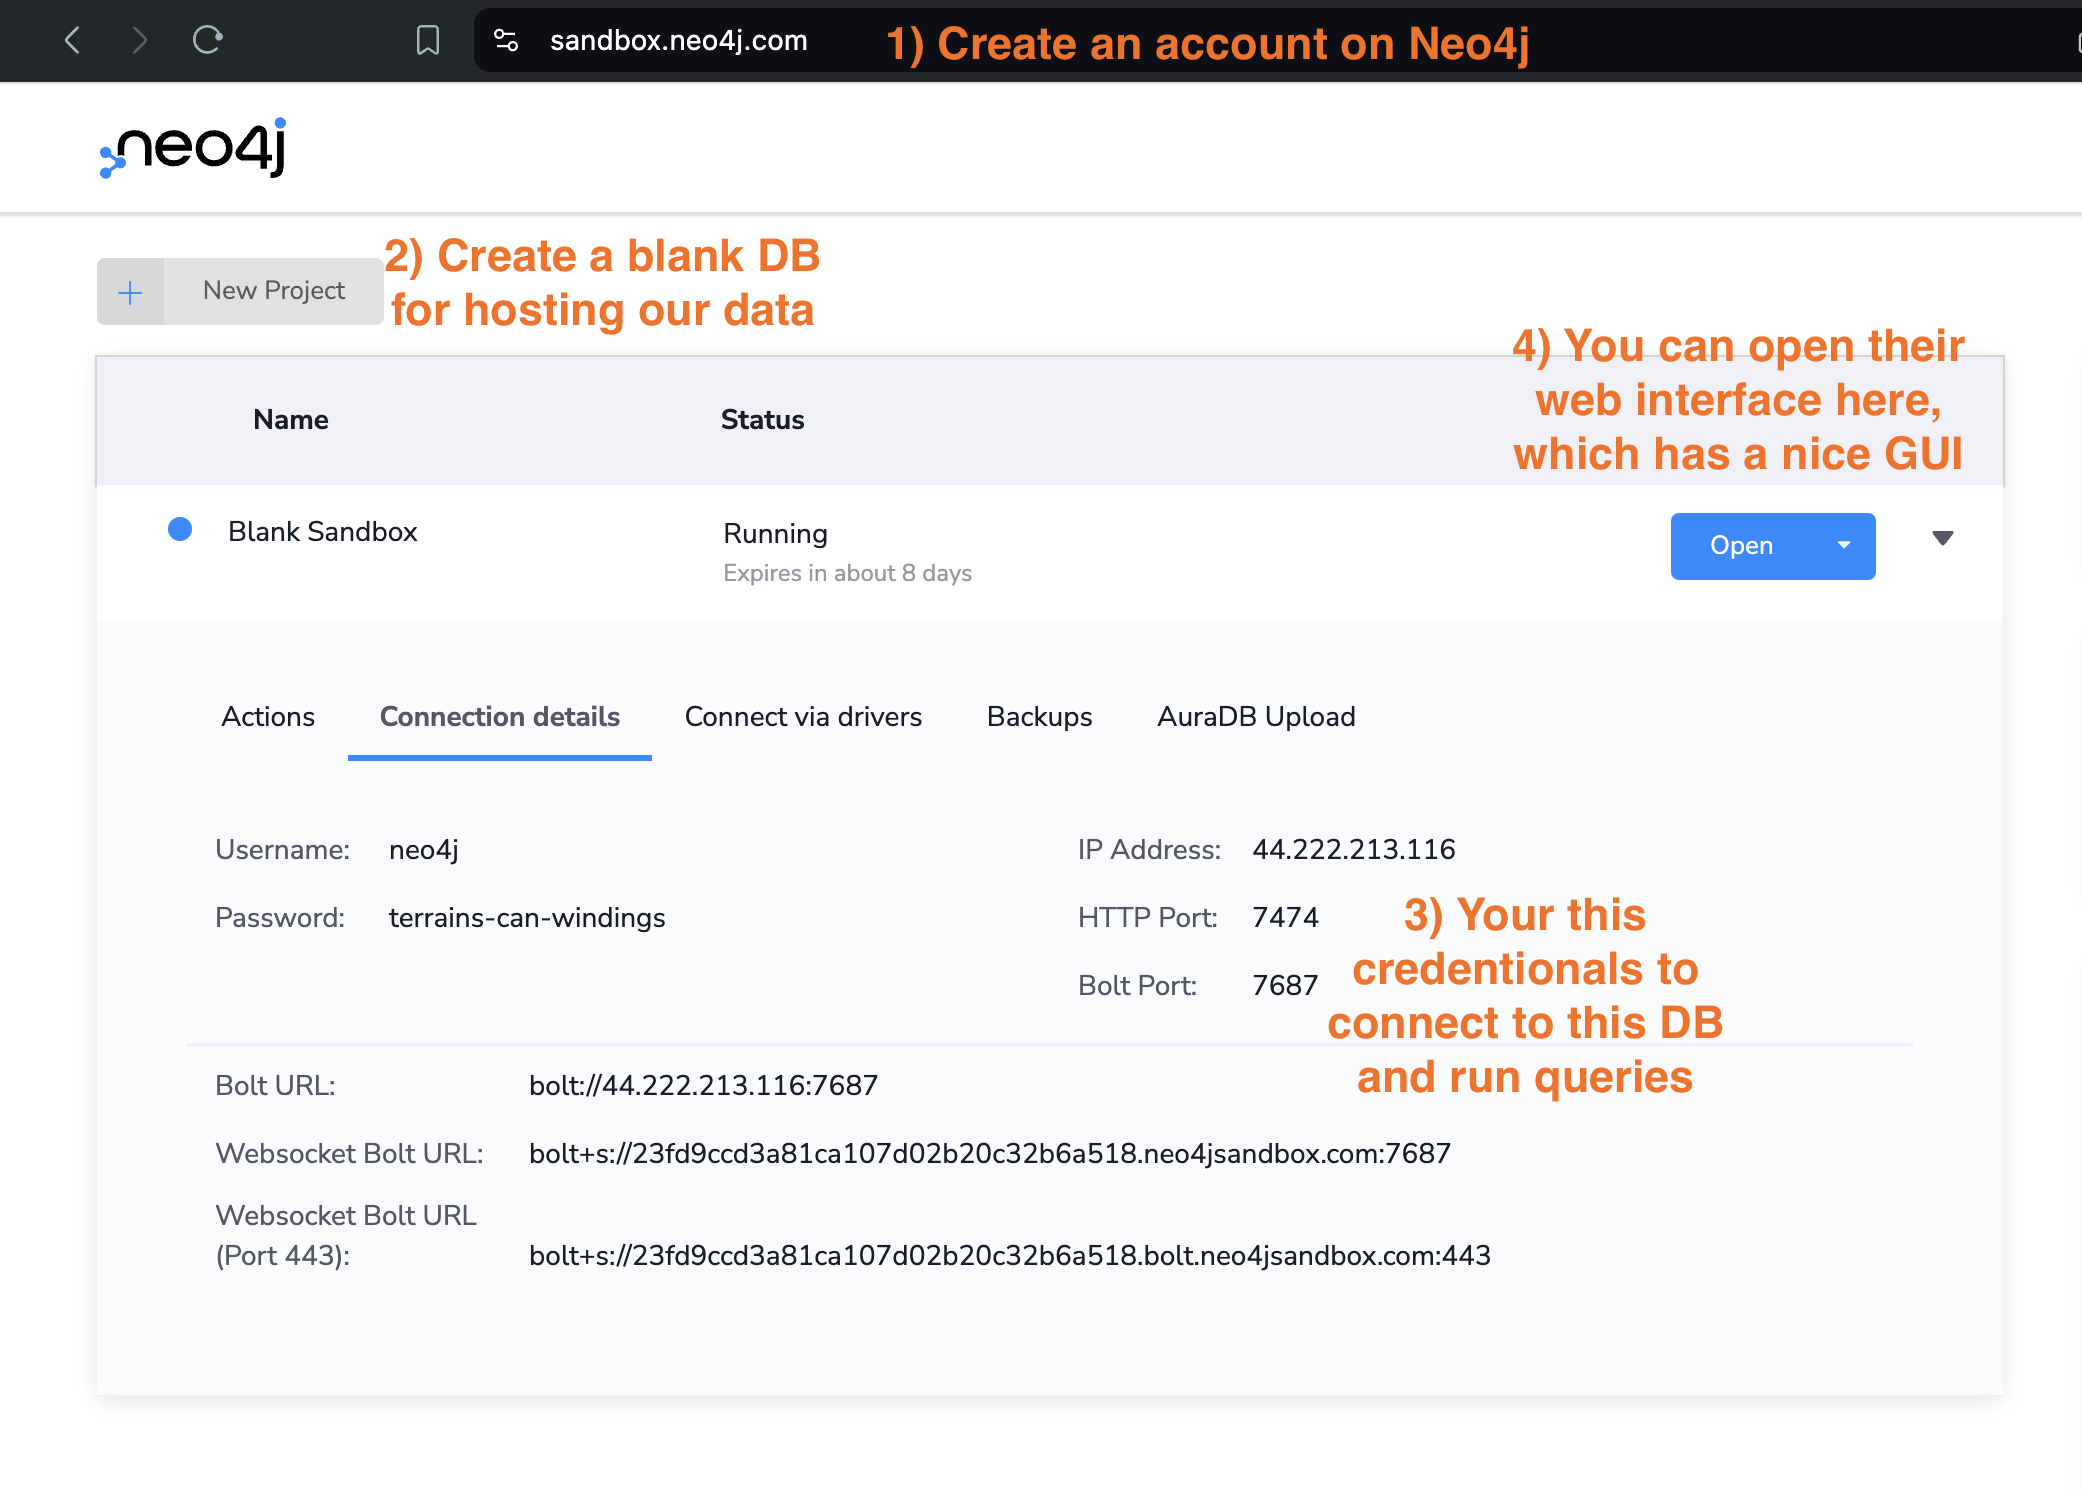

In [ ]:
from IPython.display import Image, display
display(Image(filename='neo4j_sandbox.png'))

<br>
<br>

# 2) Project Management

<h2> Covered in the previous notebook </h2>
<br>
<br>
<br>

# 3) Env Setup

In [1]:
!pip install -q langchain==0.2.3 langchain_experimental umap-learn scikit-learn langchain_community tiktoken langchain-openai langchainhub chromadb langchain-anthropic wikipedia
!pip install -qbeautifulsoup4 lxml # for scraping and parsing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.0/974.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.5/202.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.8/321.8 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.1/127.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.8 MB/s 

In [2]:
!pip install -q streamlit
!npm install -q localtunnel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.7 MB/s eta 0:00:00
npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 5.628s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [3]:
# Required libraries by knowledge graph
!pip install neo4j --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 5.3 MB/s eta 0:00:00


In [ ]:
%%writefile requirements_Inventures_KG_RAG_with_UI.txt
# pip freeze on Google Colab

Writing requirements_Inventures_KG_RAG_with_UI.txt


In [ ]:
!pip freeze >> requirements_Inventures_KG_RAG_with_UI.txt

In [5]:
%%writefile mylibs.py
# Importing libraries
import os
import pickle
import json # saving sessions data in a json file
from google.colab import userdata # for importing env variable on Colab
import matplotlib.pyplot as plt
import tiktoken # for counting the # of tokens in each document
import numpy as np
import pandas as pd
import umap # for dimensionality reduction
from sklearn.mixture import GaussianMixture # for clustering
from typing import Dict, List, Optional, Tuple # for type hinting

from bs4 import BeautifulSoup # for scraping and parsing

# Wikiloader in case we want to retrieve data from Wikipedia as a trainset
from langchain_community.document_loaders import WikipediaLoader
# converting doc_text files into langchain document objects
from langchain.docstore.document import Document

from langchain_openai import OpenAIEmbeddings # For text-to-vector
from langchain_openai import ChatOpenAI # For API call to LLM
from langchain_anthropic import ChatAnthropic # Alternative to OpenAI LLM

from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

RANDOM_SEED = 307  # Fixed seed for reproducibility of clustering

from langchain_community.vectorstores import Chroma #In-memory VectorDB

from langchain import hub # Langchain Hub for RAG prompt templates
# placeholder used in chain
from langchain_core.runnables import RunnablePassthrough
import streamlit as st



#### Knowledge Graph imports
from langchain_experimental.graph_transformers.diffbot import DiffbotGraphTransformer
from langchain_community.graphs import Neo4jGraph
from langchain.chains import GraphCypherQAChain

from langchain_core.messages import HumanMessage, SystemMessage

Writing mylibs.py


In [6]:
# Args and global variables
os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")
os.environ["ANTHROPIC_API_KEY"] = 'anthropic-api-key'

# 4) Data Handeling

## 4.1 Scraping and parsing the data

In [7]:
def parse_sessions_html(html_file_add):
  # Read the HTML file
  with open(html_file_add, 'r', encoding='utf-8') as file:
    html_content = file.read()

  # Parse the HTML content using BeautifulSoup
  soup = BeautifulSoup(html_content, 'lxml')

  # Extract session details
  sessions = []
  session_divs = soup.find_all('div', attrs={"x-html": "session.card_template"})

  for session_div in session_divs:
    session = {}

    # Extract session category
    category_tag = session_div.find('span', class_="block w-fit bg-green py-2 -mt-1 md:ml-0 px-6 lg:pr-8 text-xs font-moderna rounded-br-full")
    session['category'] = category_tag.text.strip() if category_tag else None

    # Extract session title
    title_tag = session_div.find('h2', class_="font-moderna uppercase text-base xl:text-lg text-purple")
    session['title'] = title_tag.text.strip() if title_tag else None

    # Extract session description
    description_tag = session_div.find('div', class_="cursor-pointer text-base line-clamp-2")
    session['description'] = description_tag.text.strip() if description_tag else None

    # Extract speakers
    speakers = []
    speaker_section = session_div.find('div', class_="md:border-t border-slate-200 md:pt-4")
    if speaker_section:
      speaker_buttons = speaker_section.find_all('button', class_="group relative flex gap-4 justify-start items-center !no-underline")
      for speaker_button in speaker_buttons:
        speaker = {}

        # Extract speaker name
        name_tag = speaker_button.find('h4', class_="text-sm font-moderna")
        speaker['name'] = name_tag.text.strip() if name_tag else None

        # Extract speaker position
        position_tag = speaker_button.find('p', class_="override text-sm leading-tight text-slate-500")
        speaker['position'] = position_tag.text.strip() if position_tag else None

        speakers.append(speaker)

    session['speakers'] = speakers
    sessions.append(session)

  sessions.pop(0) # The first session is empty
  # Convert the sessions list to a JSON string
  json_string = json.dumps(sessions)
  # Write the JSON string to a file
  with open('sessions.json', 'w') as f:
    f.write(json_string)

  return sessions


## 4.2) Processing data

In [8]:
def save_sessions_to_text_files(sessions):
    """Save sessions to a separate text files."""
    for i, session in enumerate(sessions, start=1):
      category = session['category']
      title = session['title']
      description = session['description']
      speakers = session['speakers']
      content = f"A session under the category of : {category} which is titled as: {title} is held at Inventures. The description of this session is: {description}. \n "

      if speakers:
        content += "The speakers of this session are: \n"
      for speaker in speakers:
        name = speaker['name']
        position = speaker['position']
        content += f"  - Name: {name} who has a position: {position}\n"

      content += "\n"

      with open(f"./sessions_txt/{i}.txt", "a", encoding='utf-8') as file:
        file.write(content)
        file.close()

# 5) Modeling

In [9]:
# Reference for this cell:
# https://github.com/langchain-ai/langchain/blob/master/cookbook/

### --- Code from citations referenced above (added comments and docstrings) --- ###


def global_cluster_embeddings(
    embeddings: np.ndarray,
    dim: int,
    n_neighbors: Optional[int] = None,
    metric: str = "cosine",
) -> np.ndarray:
    """
    Perform global dimensionality reduction on the embeddings using UMAP.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - dim: The target dimensionality for the reduced space.
    - n_neighbors: Optional; the number of neighbors to consider for each point.
                   If not provided, it defaults to the square root of the number of embeddings.
    - metric: The distance metric to use for UMAP.

    Returns:
    - A numpy array of the embeddings reduced to the specified dimensionality.
    """
    if n_neighbors is None:
        n_neighbors = int((len(embeddings) - 1) ** 0.5)
    return umap.UMAP(
        n_neighbors=n_neighbors, n_components=dim, metric=metric
    ).fit_transform(embeddings)


def local_cluster_embeddings(
    embeddings: np.ndarray, dim: int, num_neighbors: int = 10, metric: str = "cosine"
) -> np.ndarray:
    """
    Perform local dimensionality reduction on the embeddings using UMAP, typically after global clustering.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - dim: The target dimensionality for the reduced space.
    - num_neighbors: The number of neighbors to consider for each point.
    - metric: The distance metric to use for UMAP.

    Returns:
    - A numpy array of the embeddings reduced to the specified dimensionality.
    """
    return umap.UMAP(
        n_neighbors=num_neighbors, n_components=dim, metric=metric
    ).fit_transform(embeddings)


def get_optimal_clusters(
    embeddings: np.ndarray, max_clusters: int = 50, random_state: int = RANDOM_SEED
) -> int:
    """
    Determine the optimal number of clusters using the Bayesian Information Criterion (BIC) with a Gaussian Mixture Model.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - max_clusters: The maximum number of clusters to consider.
    - random_state: Seed for reproducibility.

    Returns:
    - An integer representing the optimal number of clusters found.
    """
    max_clusters = min(max_clusters, len(embeddings))
    n_clusters = np.arange(1, max_clusters)
    bics = []
    for n in n_clusters:
        gm = GaussianMixture(n_components=n, random_state=random_state)
        gm.fit(embeddings)
        bics.append(gm.bic(embeddings))
    return n_clusters[np.argmin(bics)]


def GMM_cluster(embeddings: np.ndarray, threshold: float, random_state: int = 0):
    """
    Cluster embeddings using a Gaussian Mixture Model (GMM) based on a probability threshold.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - threshold: The probability threshold for assigning an embedding to a cluster.
    - random_state: Seed for reproducibility.

    Returns:
    - A tuple containing the cluster labels and the number of clusters determined.
    """
    n_clusters = get_optimal_clusters(embeddings)
    gm = GaussianMixture(n_components=n_clusters, random_state=random_state)
    gm.fit(embeddings)
    probs = gm.predict_proba(embeddings)
    labels = [np.where(prob > threshold)[0] for prob in probs]
    return labels, n_clusters


def perform_clustering(
    embeddings: np.ndarray,
    dim: int,
    threshold: float,
) -> List[np.ndarray]:
    """
    Perform clustering on the embeddings by first reducing their dimensionality globally, then clustering
    using a Gaussian Mixture Model, and finally performing local clustering within each global cluster.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - dim: The target dimensionality for UMAP reduction.
    - threshold: The probability threshold for assigning an embedding to a cluster in GMM.

    Returns:
    - A list of numpy arrays, where each array contains the cluster IDs for each embedding.
    """
    if len(embeddings) <= dim + 1:
        # Avoid clustering when there's insufficient data
        return [np.array([0]) for _ in range(len(embeddings))]

    # Global dimensionality reduction
    reduced_embeddings_global = global_cluster_embeddings(embeddings, dim)
    # Global clustering
    global_clusters, n_global_clusters = GMM_cluster(
        reduced_embeddings_global, threshold
    )

    all_local_clusters = [np.array([]) for _ in range(len(embeddings))]
    total_clusters = 0

    # Iterate through each global cluster to perform local clustering
    for i in range(n_global_clusters):
        # Extract embeddings belonging to the current global cluster
        global_cluster_embeddings_ = embeddings[
            np.array([i in gc for gc in global_clusters])
        ]

        if len(global_cluster_embeddings_) == 0:
            continue
        if len(global_cluster_embeddings_) <= dim + 1:
            # Handle small clusters with direct assignment
            local_clusters = [np.array([0]) for _ in global_cluster_embeddings_]
            n_local_clusters = 1
        else:
            # Local dimensionality reduction and clustering
            reduced_embeddings_local = local_cluster_embeddings(
                global_cluster_embeddings_, dim
            )
            local_clusters, n_local_clusters = GMM_cluster(
                reduced_embeddings_local, threshold
            )

        # Assign local cluster IDs, adjusting for total clusters already processed
        for j in range(n_local_clusters):
            local_cluster_embeddings_ = global_cluster_embeddings_[
                np.array([j in lc for lc in local_clusters])
            ]
            indices = np.where(
                (embeddings == local_cluster_embeddings_[:, None]).all(-1)
            )[1]
            for idx in indices:
                all_local_clusters[idx] = np.append(
                    all_local_clusters[idx], j + total_clusters
                )

        total_clusters += n_local_clusters

    return all_local_clusters


### --- Our code below --- ###


def embed(texts):
    """
    Generate embeddings for a list of text documents.

    This function assumes the existence of an `embd` object with a method `embed_documents`
    that takes a list of texts and returns their embeddings.

    Parameters:
    - texts: List[str], a list of text documents to be embedded.

    Returns:
    - numpy.ndarray: An array of embeddings for the given text documents.
    """
    text_embeddings = embd.embed_documents(texts)
    text_embeddings_np = np.array(text_embeddings)
    return text_embeddings_np


def embed_cluster_texts(texts):
    """
    Embeds a list of texts and clusters them, returning a DataFrame with texts, their embeddings, and cluster labels.

    This function combines embedding generation and clustering into a single step. It assumes the existence
    of a previously defined `perform_clustering` function that performs clustering on the embeddings.

    Parameters:
    - texts: List[str], a list of text documents to be processed.

    Returns:
    - pandas.DataFrame: A DataFrame containing the original texts, their embeddings, and the assigned cluster labels.
    """
    text_embeddings_np = embed(texts)  # Generate embeddings
    cluster_labels = perform_clustering(
        text_embeddings_np, 10, 0.1
    )  # Perform clustering on the embeddings
    df = pd.DataFrame()  # Initialize a DataFrame to store the results
    df["text"] = texts  # Store original texts
    df["embd"] = list(text_embeddings_np)  # Store embeddings as a list in the DataFrame
    df["cluster"] = cluster_labels  # Store cluster labels
    return df


def fmt_txt(df: pd.DataFrame) -> str:
    """
    Formats the text documents in a DataFrame into a single string.

    Parameters:
    - df: DataFrame containing the 'text' column with text documents to format.

    Returns:
    - A single string where all text documents are joined by a specific delimiter.
    """
    unique_txt = df["text"].tolist()
    return "--- --- \n --- --- ".join(unique_txt)


def embed_cluster_summarize_texts(
    texts: List[str], level: int
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Embeds, clusters, and summarizes a list of texts. This function first generates embeddings for the texts,
    clusters them based on similarity, expands the cluster assignments for easier processing, and then summarizes
    the content within each cluster.

    Parameters:
    - texts: A list of text documents to be processed.
    - level: An integer parameter that could define the depth or detail of processing.

    Returns:
    - Tuple containing two DataFrames:
      1. The first DataFrame (`df_clusters`) includes the original texts, their embeddings, and cluster assignments.
      2. The second DataFrame (`df_summary`) contains summaries for each cluster, the specified level of detail,
         and the cluster identifiers.
    """

    # Embed and cluster the texts, resulting in a DataFrame with 'text', 'embd', and 'cluster' columns
    df_clusters = embed_cluster_texts(texts)

    # Prepare to expand the DataFrame for easier manipulation of clusters
    expanded_list = []

    # Expand DataFrame entries to document-cluster pairings for straightforward processing
    for index, row in df_clusters.iterrows():
        for cluster in row["cluster"]:
            expanded_list.append(
                {"text": row["text"], "embd": row["embd"], "cluster": cluster}
            )

    # Create a new DataFrame from the expanded list
    expanded_df = pd.DataFrame(expanded_list)

    # Retrieve unique cluster identifiers for processing
    all_clusters = expanded_df["cluster"].unique()

    print(f"--Generated {len(all_clusters)} clusters--")

    # Summarization
    template = """
    Give a detailed summary of the documentation provided.

    Documentation:
    {context}
    """
    prompt = ChatPromptTemplate.from_template(template)
    chain = prompt | model | StrOutputParser()

    # Format text within each cluster for summarization
    summaries = []
    for i in all_clusters:
        df_cluster = expanded_df[expanded_df["cluster"] == i]
        formatted_txt = fmt_txt(df_cluster)
        summaries.append(chain.invoke({"context": formatted_txt}))

    # Create a DataFrame to store summaries with their corresponding cluster and level
    df_summary = pd.DataFrame(
        {
            "summaries": summaries,
            "level": [level] * len(summaries),
            "cluster": list(all_clusters),
        }
    )

    return df_clusters, df_summary


def recursive_embed_cluster_summarize(
    texts: List[str], level: int = 1, n_levels: int = 3
) -> Dict[int, Tuple[pd.DataFrame, pd.DataFrame]]:
    """
    Recursively embeds, clusters, and summarizes texts up to a specified level or until
    the number of unique clusters becomes 1, storing the results at each level.

    Parameters:
    - texts: List[str], texts to be processed.
    - level: int, current recursion level (starts at 1).
    - n_levels: int, maximum depth of recursion.

    Returns:
    - Dict[int, Tuple[pd.DataFrame, pd.DataFrame]], a dictionary where keys are the recursion
      levels and values are tuples containing the clusters DataFrame and summaries DataFrame at that level.
    """
    results = {}  # Dictionary to store results at each level

    # Perform embedding, clustering, and summarization for the current level
    df_clusters, df_summary = embed_cluster_summarize_texts(texts, level)

    # Store the results of the current level
    results[level] = (df_clusters, df_summary)

    # Determine if further recursion is possible and meaningful
    unique_clusters = df_summary["cluster"].nunique()
    if level < n_levels and unique_clusters > 1:
        # Use summaries as the input texts for the next level of recursion
        new_texts = df_summary["summaries"].tolist()
        next_level_results = recursive_embed_cluster_summarize(
            new_texts, level + 1, n_levels
        )

        # Merge the results from the next level into the current results dictionary
        results.update(next_level_results)

    return results


# 6) Evaluation

In [ ]:
# We don't have any code for automatically evaluating the result.
# We have human evaluation on different aspects of automatic text
# summarization and question answering

# 7) Deployment & Maintnance

In [10]:
%%capture
!unzip sessions_txt.zip

In [50]:
for i, doc in enumerate(doc_text,start=1):
  if "David Bland" in doc:
    print(f"Found! {i=}")
    break

Found! i=14


## 7.1) RAG codes

In [11]:
doc_text = [] # loading the txt files into a list of strings
for i in range(1,187):
  with open(f'./sessions_txt/{i}.txt', 'r') as file:
    data = file.read()
    doc_text.append(data)

In [12]:
raw_documents = []
for i in range(len(doc_text)):
  raw_documents.append(Document(page_content=doc_text[i], metadata={"source": "local", 'id':i+1}))

In [13]:
embd = OpenAIEmbeddings()
model = ChatOpenAI(temperature=0, model="gpt-3.5-turbo", max_tokens=4096)
# model = ChatAnthropic(temperature=0, model="claude-3-opus-20240229")

In [14]:
leaf_texts = doc_text

In [ ]:
# Build document tree
# results = recursive_embed_cluster_summarize(leaf_texts, level=1, n_levels=3)

In [15]:
# prompt: unpickle results.pkl into results
with open("results.pkl", "rb") as f:
    results = pickle.load(f)

In [ ]:
# # prompt: pickle results
# # Choose a filename for the pickle file
# pickle_file = "results.pkl"

# # Open the pickle file for writing in binary mode
# with open(pickle_file, "wb") as f:
#     # Use pickle.dump to serialize the results dictionary into the file
#     pickle.dump(results, f)

In [16]:
results[3][1]

,summaries,level,cluster
0,The documentation provided offers a detailed s...,3,0


In [17]:
# Initialize all_texts with leaf_texts
all_texts = leaf_texts.copy()

# Iterate through the results to extract summaries from each level and add them to all_texts
for level in sorted(results.keys()):
    # Extract summaries from the current level's DataFrame
    summaries = results[level][1]["summaries"].tolist()
    # Extend all_texts with the summaries from the current level
    all_texts.extend(summaries)

# Now, use all_texts to build the vectorstore with Chroma
vectorstore = Chroma.from_texts(texts=all_texts, embedding=embd)
retriever = vectorstore.as_retriever()

In [18]:
# Prompt
prompt = hub.pull("rlm/rag-prompt")


# Post-processing (joining all docs retrieved after vector search)
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)


# Chain
rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)


In [19]:
# Question
query = "Tell me about the topics discussed at Inventures"
rag_ans = rag_chain.invoke(query)
rag_ans

'The topics discussed at Inventures include technology, innovation, entrepreneurship, policy, healthcare, agri-food, sustainability, AI, quantum computing, IoT, e-sports, animal welfare, and more. Expert speakers share insights and advancements in their respective fields, emphasizing collaboration, sustainability, innovation, and social impact in shaping the future of different sectors and regions. Sessions cover a wide range of themes and provide valuable knowledge and strategies for navigating the entrepreneurial landscape effectively.'

In [22]:
# Question
query2 = "how many sessions did Laura Kilcrease speak at?"
rag_ans2 = rag_chain.invoke(query2)
rag_ans2

'Laura Kilcrease spoke at two sessions at Inventures: the Blurring Boundaries session with Dame Sheila Barry Driscoll and the Featured Closing Ceremony.'

In [21]:
query3 = "How many sessions did we have?"
rag_ans3 = rag_chain.invoke(query3)
rag_ans3

'There were four sessions held at Inventures.'

## 7.2) Knowledge Graph codes

<h3>Wait a minute. Where did I get this idea that KG can improve the performance. </h3>
<li> My M.Sc. thesis has been on using graphs in LLMs. </li>
<li> I read some related works about using graphs for improving RAG systems and factual consistency </li>

<h3>OK, then why did you use Diffbot API and not others? </h3>
Well, it was free comparing to GPT-based models

<br>
<br>
<br>

In [23]:
url = "bolt://44.222.213.116:7687"
username = "neo4j"
os.environ["NEO4J_PASS"] = userdata.get('NEO4J_PASS') # we need to pass the password to os so that we can access it in our app.py
password = os.environ["NEO4J_PASS"]

graph = Neo4jGraph(url=url, username=username, password=password)

In [25]:
is_graph_already_built = True
if not is_graph_already_built:
  # load Diffbot Token for later entity and relationship extraction
  os.environ["DIFFBOT_API_KEY"] = userdata.get('DIFFBOT_TOKEN')
  diffbot_nlp = DiffbotGraphTransformer(diffbot_api_key=os.environ["DIFFBOT_API_KEY"])
  # use Diffbot Graph Transformer to extract entities/relationships from Wikipedia articles
  graph_documents = diffbot_nlp.convert_to_graph_documents(raw_documents)
  # import extracted entities and relationships into neo4j graph database
  graph.add_graph_documents(graph_documents)

In [26]:
# # Save the graph documents to a pickle file
# with open('inventures_graph_documents.pkl', 'wb') as f:
#   pickle.dump(graph_documents, f)

with open("inventures_graph_documents.pkl", "rb") as f:
  graph_documents = pickle.load(f)

In [27]:
graph_documents[6]

GraphDocument(nodes=[Node(id='David Sweeney', type='Person', properties={'name': 'David Sweeney', 'positionHeld': 'Professor'}), Node(id='http://www.wikidata.org/entity/Q223429', type='Organization', properties={'name': 'University of Birmingham'}), Node(id='http://www.wikidata.org/entity/Q6833913', type='Person', properties={'name': 'Michael Robertson'}), Node(id='http://www.wikidata.org/entity/Q640694', type='Organization', properties={'name': 'University of Alberta'}), Node(id='http://www.linkedin.com/in/jacqueline-wilson-smith-1222595', type='Person', properties={'name': 'Jacqueline Wilson-Smith', 'positionHeld': 'Director & Strategic Facilitator'}), Node(id='http://www.wikidata.org/entity/Q1117048', type='Organization', properties={'name': 'CSIRO'}), Node(id='Sustainable Innovation Co.', type='Organization', properties={'name': 'Sustainable Innovation Co.'})], relationships=[Relationship(source=Node(id='David Sweeney', type='Person'), target=Node(id='http://www.wikidata.org/entity

In [28]:
type(graph_documents), type(graph_documents[0])

(list, langchain_community.graphs.graph_document.GraphDocument)

In [29]:
print(graph.schema)

Node properties:
Person {positionHeld: STRING, id: STRING, name: STRING}
Organization {id: STRING, name: STRING}
Location {id: STRING, name: STRING}
Award {id: STRING, name: STRING}
Skill {name: STRING, id: STRING}
Relationship properties:
EMPLOYEE_OR_MEMBER_OF {evidence: STRING, positionHeld: STRING, isCurrent: STRING, isNotCurrent: STRING}
PARTNERSHIP {evidence: STRING}
CHIEF_EXECUTIVE_OFFICER {isCurrent: STRING, evidence: STRING}
ORGANIZATION_LOCATIONS {evidence: STRING, isCurrent: STRING}
WORK_RELATIONSHIP {evidence: STRING}
PERSON_LOCATION {evidence: STRING}
BOARD_MEMBER {isCurrent: STRING, evidence: STRING}
AWARDS {evidence: STRING}
FOUNDED_BY {evidence: STRING}
SOCIAL_RELATIONSHIP {evidence: STRING}
FAMILY_MEMBER {evidence: STRING}
INTERESTED_IN {evidence: STRING}
The relationships:
(:Person)-[:EMPLOYEE_OR_MEMBER_OF]->(:Organization)
(:Person)-[:WORK_RELATIONSHIP]->(:Person)
(:Person)-[:PERSON_LOCATION]->(:Location)
(:Person)-[:AWARDS]->(:Award)
(:Person)-[:SOCIAL_RELATIONSHIP]-

In [30]:
# Quering the graph dataset
result = graph.query("MATCH (n) RETURN n LIMIT 1")
print(result)

[{'n': {'name': 'Laura Kilcrease', 'id': 'http://www.crunchbase.com/person/laura-kilcrease', 'positionHeld': 'Chief Executive Officer'}}]


In [ ]:
# # Manually printing the schema
# # Retrieve node labels
# node_labels_query = "MATCH (n) RETURN DISTINCT labels(n) AS labels"
# node_labels_result = graph.query(node_labels_query)
# node_labels = [record['labels'][0] for record in node_labels_result]  # assuming single label per node

# # Retrieve node properties
# node_properties = {}
# for label in node_labels:
#   properties_query = f"""
#   MATCH (n:{label})
#   RETURN DISTINCT keys(n) AS properties
#   """
#   properties_result = graph.query(properties_query)
#   properties = set()
#   for record in properties_result:
#       properties.update(record['properties'])
#   node_properties[label] = list(properties)

# # Retrieve relationship types
# relationship_types_query = "MATCH ()-[r]->() RETURN DISTINCT type(r) AS relationshipType"
# relationship_types_result = graph.query(relationship_types_query)
# relationship_types = [record['relationshipType'] for record in relationship_types_result]

# # Retrieve relationship properties
# relationship_properties = {}
# for rel_type in relationship_types:
#   properties_query = f"""
#   MATCH ()-[r:{rel_type}]->()
#   RETURN DISTINCT keys(r) AS properties
#   """
#   properties_result = graph.query(properties_query)
#   properties = set()
#   for record in properties_result:
#       properties.update(record['properties'])
#   relationship_properties[rel_type] = list(properties)

# # Print the schema in the specified format
# print("Node properties:")
# for node_type, properties in node_properties.items():
#   print(f"{node_type}: {properties}")

# print("\nRelationship properties:")
# for relationship_type, properties in relationship_properties.items():
#   print(f"{relationship_type}: {properties}")

# print("\nThe relationships:")
# for relationship in relationship_types:
#   print(relationship)

In [31]:
cypher_chain = GraphCypherQAChain.from_llm(
    cypher_llm=model,
    qa_llm=model,
    graph=graph,
    verbose=True,
    return_intermediate_steps=True
)

In [32]:
kg_answer = cypher_chain.invoke("Who are the people working at the same company as Laura Kilcrease does??")
print("\n\nFinal kg answer:\n\n")
kg_answer



> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (p1:Person {name: "Laura Kilcrease"})-[:EMPLOYEE_OR_MEMBER_OF]->(o:Organization)<-[:EMPLOYEE_OR_MEMBER_OF]-(p2:Person)
RETURN p2.name
Full Context:
[{'p2.name': 'Bruce Birdsell'}, {'p2.name': 'Dave Waldbilig'}, {'p2.name': 'Sunil Rajput'}, {'p2.name': 'Dana Gibson'}, {'p2.name': 'Zhihong (John) Zhou'}, {'p2.name': 'Mehr Nikoo'}, {'p2.name': "Ross O'Brien"}, {'p2.name': 'Bruce Duong'}, {'p2.name': 'Stephan Zuberec'}, {'p2.name': 'Reesa John'}]

> Finished chain.


Final kg answer:




{'query': 'Who are the people working at the same company as Laura Kilcrease does??',
 'result': "Bruce Birdsell, Dave Waldbilig, Sunil Rajput, Dana Gibson, Zhihong (John) Zhou, Mehr Nikoo, Ross O'Brien, Bruce Duong, Stephan Zuberec, Reesa John are the people working at the same company as Laura Kilcrease.",
 'intermediate_steps': [{'query': 'MATCH (p1:Person {name: "Laura Kilcrease"})-[:EMPLOYEE_OR_MEMBER_OF]->(o:Organization)<-[:EMPLOYEE_OR_MEMBER_OF]-(p2:Person)\nRETURN p2.name'},
  {'context': [{'p2.name': 'Bruce Birdsell'},
    {'p2.name': 'Dave Waldbilig'},
    {'p2.name': 'Sunil Rajput'},
    {'p2.name': 'Dana Gibson'},
    {'p2.name': 'Zhihong (John) Zhou'},
    {'p2.name': 'Mehr Nikoo'},
    {'p2.name': "Ross O'Brien"},
    {'p2.name': 'Bruce Duong'},
    {'p2.name': 'Stephan Zuberec'},
    {'p2.name': 'Reesa John'}]}]}

In [37]:
query2 = "How many sessions did Laura Kilcrease participate in?"
kg_answer2 = cypher_chain.invoke(query2)
print("\n\nFinal kg answer:\n\n")
kg_answer2



> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (p:Person {name: "Laura Kilcrease"})-[:WORK_RELATIONSHIP]->(p2:Person)
RETURN COUNT(p2)
Full Context:
[{'COUNT(p2)': 0}]

> Finished chain.


Final kg answer:




{'query': 'How many sessions did Laura Kilcrease participate in?',
 'result': "I don't know the answer.",
 'intermediate_steps': [{'query': 'MATCH (p:Person {name: "Laura Kilcrease"})-[:WORK_RELATIONSHIP]->(p2:Person)\nRETURN COUNT(p2)'},
  {'context': [{'COUNT(p2)': 0}]}]}

In [39]:
query3 = "How many sessions did we have"
kg_answer3 = cypher_chain.invoke(query3)
print("\n\nFinal kg answer:\n\n")
kg_answer3



> Entering new GraphCypherQAChain chain...
Generated Cypher:
I'm sorry, I can only generate Cypher statements for querying a graph database based on the provided schema. Let me know if you need help with that.


ValueError: Generated Cypher Statement is not valid
{code: Neo.ClientError.Statement.SyntaxError} {message: Invalid input 'I': expected
  "ALTER"
  "CALL"
  "CREATE"
  "DEALLOCATE"
  "DELETE"
  "DENY"
  "DETACH"
  "DROP"
  "DRYRUN"
  "ENABLE"
  "FINISH"
  "FOREACH"
  "GRANT"
  "INSERT"
  "LOAD"
  "MATCH"
  "MERGE"
  "NODETACH"
  "OPTIONAL"
  "REALLOCATE"
  "REMOVE"
  "RENAME"
  "RETURN"
  "REVOKE"
  "SET"
  "SHOW"
  "START"
  "STOP"
  "TERMINATE"
  "UNWIND"
  "USE"
  "USING"
  "WITH" (line 1, column 1 (offset: 0))
"I'm sorry, I can only generate Cypher statements for querying a graph database based on the provided schema. Let me know if you need help with that."
 ^}

## 7.3) RAG enriched with KG

In [ ]:
# Define your previously generated outputs
rag_answer = rag_ans3
cypher_knowledge_graph_answer = kg_answer3


In [ ]:
input_text = (
    "You are given a question and an original answer and a supplimentary information from knowledge graph. "
    "Your job as an accurate assistant is to enhance the original answer with the supplementary information, if given."
    "You should rely more on the knowledge graph informaiton, if given.\n\n"
    f"Question: {query3}\n"
    f"Original Answer: {rag_answer}\n"
    f"Cypher Knowledge Graph Answer: {cypher_knowledge_graph_answer}"
)

In [ ]:
# Generate the final answer using the chat method
final_answer = model.invoke(input_text)

print(final_answer.content)

Supplementary Information: Laura did not participate in any sessions.

Enhanced Answer: Laura did not participate in any sessions at Inventures.


## 7.4) UI with streamlit

In [ ]:
%%writefile app.py
#initial files
import streamlit as st
import logging

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler("/content/logs.txt"),
        logging.StreamHandler()
    ]
)

st.title("Eco Bot")
with st.chat_message("assistant"):
  st.write("Hello! Please wait till I spin up 🔄 ...")

if 'initialized' not in st.session_state:
  # python does not have block-level scope within conditional
  # statements (if, for, while, etc.). Instead, Python uses function-level
  # scope. This means that variables defined inside an if statement
  # are still accessible outside of that statement, provided they are
  # within the same function or global scope. But, streamlit only remembers
  # the st.session_state in subsequent runs. That's why we need to store
  # rag_chain in state
  from mylibs import *
  st.session_state.initialized = True
  # Initialize chat history
  if "messages" not in st.session_state:
    st.session_state.messages = []

  doc_text = [] # loading the txt files into a list of strings
  for i in range(1,187):
    with open(f'./sessions_txt/{i}.txt', 'r') as file:
      data = file.read()
      doc_text.append(data)

  raw_documents = []
  for i in range(len(doc_text)):
    raw_documents.append(Document(page_content=doc_text[i], metadata={"source": "local", 'id':i+1}))

  embd = OpenAIEmbeddings()
  model = ChatOpenAI(temperature=0, model="gpt-3.5-turbo", max_tokens=4096)
  st.session_state.model = model
  leaf_texts = doc_text
  # unpickle results.pkl into results
  with open("results.pkl", "rb") as f:
      results = pickle.load(f)
  # Initialize all_texts with leaf_texts
  all_texts = leaf_texts.copy()

  # Iterate through the results to extract summaries from each level and add them to all_texts
  for level in sorted(results.keys()):
    # Extract summaries from the current level's DataFrame
    summaries = results[level][1]["summaries"].tolist()
    # Extend all_texts with the summaries from the current level
    all_texts.extend(summaries)

  # Now, use all_texts to build the vectorstore with Chroma
  vectorstore = Chroma.from_texts(texts=all_texts, embedding=embd)
  retriever = vectorstore.as_retriever()

  # Prompt
  prompt = hub.pull("rlm/rag-prompt")


  # Post-processing (joining all docs retrieved after vector search)
  def format_docs(docs):
      return "\n\n".join(doc.page_content for doc in docs)

  # Chain
  st.session_state.rag_chain = (
      {"context": retriever | format_docs, "question": RunnablePassthrough()}
      | prompt
      | model
      | StrOutputParser()
  )

  # knowledge graph code
  url = "bolt://44.222.213.116:7687"
  username = "neo4j"
  password = os.environ["NEO4J_PASS"]

  graph = Neo4jGraph(url=url, username=username, password=password)
  st.session_state.cypher_chain = GraphCypherQAChain.from_llm(
    cypher_llm=model,
    qa_llm=model,
    graph=graph,
    verbose=True,
    return_intermediate_steps=True)
  with st.chat_message("assistant"):
    st.write("Ok. Hit me up :)")
else:
  # Retrieve the chain from session state
  rag_chain = st.session_state.rag_chain
  cypher_chain = st.session_state.cypher_chain
  model = st.session_state.model



# Display chat messages from history on app return
for message in st.session_state.messages:
    with st.chat_message(message['role']):
        st.markdown(message['content'])


# React to user input
if prompt := st.chat_input("What question do you have?"):
    # Display user message in chat message container
    with st.chat_message("user"):
        st.markdown(prompt)
    # Add user message to chat history
    st.session_state.messages.append({'role': "user", "content": prompt})

    # Invoke the RAG chain and cypher_chain to get the response
    rag_ans = rag_chain.invoke(prompt)
    try:
      # We might generate syntactically wrong cypher queries. In this case,
      # Neo4j backend throw an error that we need to catch.
      # cypher_chain, however eventually return some output.
      kg_ans = cypher_chain.invoke(prompt)
    except Exception as e:
      logging.error(f"An error occurred: {e}")
    input_text = (
    "You are given a question and an original answer and a supplimentary information from knowledge graph. "
    "Your job as an accurate assistant is to enhance the original answer with the supplementary information, if given."
    "You should rely more on the knowledge graph informaiton, if given.\n\n"
    f"Question: {prompt}\n"
    f"Original Answer: {rag_ans}\n"
    f"Cypher Knowledge Graph Answer: {kg_ans}"
    )
    logging.info(input_text) # log the input
    final_ans = model.invoke(input_text).content

    # Display assistant response in chat message container
    with st.chat_message("assistant"):
        st.markdown(final_ans)
    # Add assistant response to chat history
    st.session_state.messages.append({"role": "assistant",
                                      "content": final_ans})


Overwriting app.py


In [ ]:
# Start the app locally
!streamlit run app.py &>/content/logs.txt & curl https://loca.lt/mytunnelpassword

35.188.136.77

In [ ]:
# Expose the app to the world
!npx localtunnel --port 8501

npx: installed 22 in 2.77s
your url is: https://dull-walls-rush.loca.lt
^C


# 8) Conclusion

<pr> We attempted to address the weakness of model in answering quantitative questions by using Knowledge Graphs. For generating the knowledge graph we used Diffbot API. <strong>This off-the-shelf tool, however, could not perfectly generate the knoweldge graph that we need. We will address this with a out-of-the-box thinking in the next notebook.</strong> </pr>
<br>


Download the files from my GitHub https://github.com/Reza-Ardestani/ConversationalAI